**<h1>ES654: Introduction to Machine Learning <h1>**
<h2>Prerequisite Test<h2>





**<h2>Question 1<h2>**

Multiplication of $n\times k$ and $k\times m$ matrices will form a matrix of $n\times m$ dimensions. 
Let the first matrix be $M_1$ ($n\times k$) and second matrix be $M_2$ ($k\times m$). <br>
According to the matrix multiplication method, firstly we multiply each element from each row of $M_1$ matrix with each element from each column of $M_2$ matrix. Therefore, each element of $M_1$ is multiplied $m$ times, thus, $(nk).m$ multiplications are done in total. Now, let $M$ $(n\times m)$ be the final matrix. In each row there will be $k$ elements that will be added therefore, there will be $(k-1)$ additions to form each element of $M$ matrix. Thus, total $(nm).(k-1)$ additions. 

 **Total Multiplications: $n.k.m$** <br>
 **Total Additions: $n.m.(k-1)$**

**<h2>Question 2<h2>**

In [77]:
import timeit
import numpy as np

n=int(input())     
k=int(input())
m=int(input())

M1=np.random.randint(10, size=(n,k))
M2=np.random.randint(10, size=(k,m))

def method1(M1, M2):
  M=np.zeros((len(M1),len(M2[0])), dtype=int)
  for i in range(n):
    for j in range(m):
      for l in range(k):
        M[i][j]+=M1[i][l]*M2[l][j]
  return M

def method2(M1, M2):
  M=np.dot(M1, M2)
  return M

ResM_1=method1(M1, M2)
time1=timeit.Timer('method1(M1, M2)', 'from __main__ import method1, M1, M2')
repeat1=time1.repeat(1000, 1)
mean_time1=sum(repeat1)/len(repeat1)
sd_time1=np.std(repeat1)

ResM_2=method2(M1, M2)
time2=timeit.Timer('method2(M1, M2)', 'from __main__ import method2, M1, M2')
repeat2=time2.repeat(1000, 1)
mean_time2=sum(repeat2)/len(repeat2)
sd_time2=np.std(repeat2)

print("\n")
print("The resultant matrix using list of lists method is:")
print(ResM_1)
print("It takes", mean_time1, "seconds with deviation of", sd_time1, "/n")

print("The resultant matrix using inbuilt library is:") 
print(ResM_2)
print("It takes", mean_time2, "seconds with deviation of", sd_time2)

3
3
4


The resultant matrix using list of lists method is:
[[119  49  42  70]
 [ 22  23  29  40]
 [ 90  47  46  55]]
It takes 4.7982980013330235e-05 seconds with deviation of 2.9213253121227777e-05 /n
The resultant matrix using inbuilt library is:
[[119  49  42  70]
 [ 22  23  29  40]
 [ 90  47  46  55]]
It takes 2.071573968351004e-06 seconds with deviation of 8.157607109710447e-06


As seen above, the method using lists of lists takes more time than the method using numpy. This is because in the former method, there are 3 nested loops which makes the time complexity $O(m.n.k$). However, the latter method is faster since numpy uses BLAS (Basic Linear Algebra Subprograms) in its $np.dot$ function which is way more faster. Hence, **numpy method is faster than the list of lists method**. 

**<h2>Question 3<h2>**

To find the median it will takes $\textbf{n/2}$ **passes**. The actual method of finding the median is basically to find the middle element of a sorted array. Finding the highest element, second highest element and so on till $n/2$ steps, will take us to the median. <br>

The time complexity of the above method is $O(n^2)$ since the entire array has to be traversed $n/2$ times  $\therefore n\:.\:n/2\:=\:n^2/2$. A better method can be to sort the array by Quick Sort or Merge Sort which takes $O(nlog\:n)$ and then the middle element of this sorted array will be the median. <br>

In [78]:
import math

n=int(input("Enter the size of the array:"))

arr=np.random.randint(0, 100, size=n)

def method1(arr):
  copy1=arr.copy()
  copy2=arr.copy()
  max_element=max(arr[0], arr[1])
  Secondmax=min(arr[0], arr[1])

  for i in range(len(arr)//2 + 1):    # done +1 since // operator gives the floor value
    max_element=-math.inf
    for j in range(len(copy1)):
      if copy1[j]>max_element:
        max_element=copy1[j] 
    copy1=list(copy1)
    copy1.remove(max_element)
  ans1=max_element
  
  for i in range(len(arr)//2):  
    max_element=-math.inf
    for j in range(len(copy2)):
      if copy2[j]>max_element:
        max_element=copy2[j] 
    max_element=max(copy2)
    copy2=list(copy2)
    copy2.remove(max_element)
  ans2=max_element

  if len(arr)%2==0:
    return (ans1+ans2)/2   
  else:
    return ans1

def method2(arr):
  arr.sort()
  mid1=arr[len(arr)//2]
  mid2=arr[(len(arr)//2)-1]
  if len(arr)%2==0:
    return (mid1+mid2)/2
  else:
    return mid1

def method3(arr):
  return np.median(arr)

print(arr, "\n") 

median1=method1(arr)
median2=method2(arr)
median3=method3(arr)

time1=timeit.Timer('method1(arr)', 'from __main__ import method1, arr')
repeat1=time1.repeat(1000, 1)
# print(repeat1)
mean_time1=sum(repeat1)/len(repeat1)
sd_time1=np.std(repeat1)

time2=timeit.Timer('method2(arr)', 'from __main__ import method2, arr')
repeat2=time2.repeat(1000, 1)
mean_time2=sum(repeat2)/len(repeat2)
sd_time2=np.std(repeat2)

time3=timeit.Timer('method3(arr)', 'from __main__ import method3, arr')
repeat3=time3.repeat(1000, 1)
mean_time3=sum(repeat3)/len(repeat3)
sd_time3=np.std(repeat3)

print("The median with Method 1 is:", median1)
print("It takes", mean_time1, "seconds to execute with a deviation of", sd_time1, "\n")  

print("The median with Method 2 is:", median2) 
print("It takes", mean_time2, "seconds to execute with a deviation of", sd_time2, "\n")

print("The median using numpy.median is:", median3)
print("It takes", mean_time3, "seconds to execute with a deviation of", sd_time3)

assert median1==median2
assert median2==median3

Enter the size of the array:50
[40 32 72 82  5 61 21 77 33 22 75 23 28 39 33 72  6 36 79 21 81 50 36 48
 59 58 14 65 70 41 82 69 57 95 97 34  9 18 71 34 99 87 98 90 37 81 63 25
 84 21] 

The median with Method 1 is: 53.5
It takes 0.0004553435140169313 seconds to execute with a deviation of 8.145125569382476e-05 

The median with Method 2 is: 53.5
It takes 1.0621230971082696e-05 seconds to execute with a deviation of 3.4420207518238656e-05 

The median using numpy.median is: 53.5
It takes 2.6273416011463268e-05 seconds to execute with a deviation of 2.3573153877974578e-05


As seen in the above output, first method takes the maximum time, using $numpy.median$ takes less time than that and finally, sorting the array and then finding the middle element takes the minimum time. 

**<h2>Question 4<h2>**

$f=x^2y+y^3sin(x)$ <br>
$grad\:f(x,y)=\triangledown\:f(x,y)$ <br>
$\triangledown\:f(x,y)=\frac{\partial f}{\partial x}i + \frac{\partial f}{\partial y}j$<br>
$\triangledown\:f(x,y)=\frac{\partial (x^2y+y^3sin(x))}{\partial x}i + \frac{\partial (x^2y+y^3sin(x))}{\partial y}j$<br>
$\triangledown\:f(x,y)=(2xy+y^3cos(x))i + (x^2+3y^2sin(x))j$<br>
**Therefore, the gradient of the function** $x^2y+y^3sin(x)$ is $(2xy+y^3cos(x))i + (x^2+3y^2sin(x))j$ 

**<h2>Question 5<h2>**

In [79]:
import jax.numpy as jnp
from jax import grad

def f(x, y):
  return np.sum((x**2)*y + (y**3)*jnp.sin(x))

def analytical_gradient_dx(x, y):
  return 2*x*y + (y**3)*jnp.cos(x)

def analytical_gradient_dy(x, y):
  return x**2 + 3*(y**2)*jnp.sin(x)

y=np.random.uniform(0, 10, size=5)
x=np.random.uniform(0, 10, size=5)

dx_jax=grad(f)(x, y)
dx_jax=list(dx_jax)
dy_jax=grad(f, 1)(x, y)
dy_jax=list(dy_jax)

# Calculating the analytical solution
dx_ana=[]
dy_ana=[]
for (i, j) in zip(x, y):
  dx_ana.append(analytical_gradient_dx(i, j))
  dy_ana.append(analytical_gradient_dy(i, j))

analytical=dx_ana+dy_ana
usingJax=dx_jax+dy_jax

print("Analytically:")
print("The x-components of the gradients are:", dx_ana)
print("The y-components of the gradients are:", dy_ana, "\n")

print("Using JAX:")
print("The x-components of the gradients are:", dx_jax)
print("The y-components of the gradients are:", dy_jax)

assert np.allclose(analytical, usingJax)

Analytically:
The x-components of the gradients are: [DeviceArray(-65.73866, dtype=float32), DeviceArray(6.531908, dtype=float32), DeviceArray(12.823658, dtype=float32), DeviceArray(97.82598, dtype=float32), DeviceArray(15.309387, dtype=float32)]
The y-components of the gradients are: [DeviceArray(41.2583, dtype=float32), DeviceArray(9.977593, dtype=float32), DeviceArray(-86.65187, dtype=float32), DeviceArray(132.79562, dtype=float32), DeviceArray(83.12417, dtype=float32)] 

Using JAX:
The x-components of the gradients are: [DeviceArray(-65.73866, dtype=float32), DeviceArray(6.5319076, dtype=float32), DeviceArray(12.823658, dtype=float32), DeviceArray(97.82598, dtype=float32), DeviceArray(15.309387, dtype=float32)]
The y-components of the gradients are: [DeviceArray(41.258297, dtype=float32), DeviceArray(9.977593, dtype=float32), DeviceArray(-86.651886, dtype=float32), DeviceArray(132.79562, dtype=float32), DeviceArray(83.12417, dtype=float32)]


**<h2>Question 6<h2>**

In [80]:
import sympy as sp

def gradient(x, y):
    f=sp.Symbol("x")**2 * sp.Symbol("y") + sp.Symbol("y")**3 * sp.sin(sp.Symbol("x"))   # defining the function: x^2.y+y^3.sin(x)
    
    # Calculating gradient of the function
    df_dx=f.diff(sp.Symbol("x"))
    df_dy=f.diff(sp.Symbol("y"))
    
    # Evaluating the gradient of function at a specific point
    dx=df_dx.evalf(subs={sp.Symbol("x"): x, sp.Symbol("y"): y})
    dy=df_dy.evalf(subs={sp.Symbol("x"): x, sp.Symbol("y"): y})

    return dx, dy

dx_sym=[]
dy_sym=[]

for (i, j) in zip(x, y):
  dx, dy=gradient(i, j)
  dx_sym.append(dx)
  dy_sym.append(dy)

print("Analytically:")
print("The x-components of the gradients are:", dx_ana)
print("The y-components of the gradients are:", dy_ana, "\n")

print("Using sympy:")
print("The x-components of the gradients are:", dx_sym)
print("The y-components of the gradients are:", dy_sym)

Analytically:
The x-components of the gradients are: [DeviceArray(-65.73866, dtype=float32), DeviceArray(6.531908, dtype=float32), DeviceArray(12.823658, dtype=float32), DeviceArray(97.82598, dtype=float32), DeviceArray(15.309387, dtype=float32)]
The y-components of the gradients are: [DeviceArray(41.2583, dtype=float32), DeviceArray(9.977593, dtype=float32), DeviceArray(-86.65187, dtype=float32), DeviceArray(132.79562, dtype=float32), DeviceArray(83.12417, dtype=float32)] 

Using sympy:
The x-components of the gradients are: [-65.7386718461887, 6.53190771597287, 12.8236665185092, 97.8259870282364, 15.3093859363514]
The y-components of the gradients are: [41.2582968088579, 9.97759418080401, -86.6518728282807, 132.795624602133, 83.1241796159548]


**<h2>Question 7<h2>**

In [81]:
Record={
    2022:{
        "Branch 1": {
            1:{"Name":"N", "Marks":{"Maths":100, "English":70, "Science":85}},
            2:{"Name":"O", "Marks":{"Maths":80, "English":80, "Science":65}},
            3:{"Name":"P", "Marks":{"Maths":90, "English":95, "Science":70}}
        },
        "Branch 2": {
            4:{"Name":"Q", "Marks":{"Maths":50, "English":84, "Science":94}},
            5:{"Name":"R", "Marks":{"Maths":87, "English":60, "Science":80}},
            6:{"Name":"S", "Marks":{"Maths":96, "English":70, "Science":61}}           
        },
    },
    2023:{
        "Branch 1": {
            1:{"Name":"T", "Marks":{"Maths":100, "English":70, "Science":85}},
            2:{"Name":"U", "Marks":{"Maths":80, "English":80, "Science":65}},
            3:{"Name":"V", "Marks":{"Maths":90, "English":95, "Science":70}}
        },
        "Branch 2": {
            4:{"Name":"W", "Marks":{"Maths":50, "English":84, "Science":94}},
            5:{"Name":"X", "Marks":{"Maths":87, "English":60, "Science":80}},
            6:{"Name":"Y", "Marks":{"Maths":96, "English":70, "Science":61}}           
        },
    },
    2024:{
        "Branch 1": {
            1:{"Name":"Z", "Marks":{"Maths":100, "English":70, "Science":85}},
            2:{"Name":"A", "Marks":{"Maths":80, "English":80, "Science":65}},
            3:{"Name":"B", "Marks":{"Maths":90, "English":95, "Science":70}}
        },
        "Branch 2": {
            4:{"Name":"C", "Marks":{"Maths":50, "English":84, "Science":94}},
            5:{"Name":"D", "Marks":{"Maths":87, "English":60, "Science":80}},
            6:{"Name":"E", "Marks":{"Maths":96, "English":70, "Science":61}}           
        },
    },
    2025:{
        "Branch 1": {
            1:{"Name":"F", "Marks":{"Maths":100, "English":70, "Science":85}},
            2:{"Name":"G", "Marks":{"Maths":80, "English":80, "Science":65}},
            3:{"Name":"H", "Marks":{"Maths":90, "English":95, "Science":70}}
        },
        "Branch 2": {
            4:{"Name":"I", "Marks":{"Maths":50, "English":84, "Science":94}},
            5:{"Name":"J", "Marks":{"Maths":87, "English":60, "Science":80}},
            6:{"Name":"K", "Marks":{"Maths":96, "English":70, "Science":61}}           
        }
    }
}

print(Record)

{2022: {'Branch 1': {1: {'Name': 'N', 'Marks': {'Maths': 100, 'English': 70, 'Science': 85}}, 2: {'Name': 'O', 'Marks': {'Maths': 80, 'English': 80, 'Science': 65}}, 3: {'Name': 'P', 'Marks': {'Maths': 90, 'English': 95, 'Science': 70}}}, 'Branch 2': {4: {'Name': 'Q', 'Marks': {'Maths': 50, 'English': 84, 'Science': 94}}, 5: {'Name': 'R', 'Marks': {'Maths': 87, 'English': 60, 'Science': 80}}, 6: {'Name': 'S', 'Marks': {'Maths': 96, 'English': 70, 'Science': 61}}}}, 2023: {'Branch 1': {1: {'Name': 'T', 'Marks': {'Maths': 100, 'English': 70, 'Science': 85}}, 2: {'Name': 'U', 'Marks': {'Maths': 80, 'English': 80, 'Science': 65}}, 3: {'Name': 'V', 'Marks': {'Maths': 90, 'English': 95, 'Science': 70}}}, 'Branch 2': {4: {'Name': 'W', 'Marks': {'Maths': 50, 'English': 84, 'Science': 94}}, 5: {'Name': 'X', 'Marks': {'Maths': 87, 'English': 60, 'Science': 80}}, 6: {'Name': 'Y', 'Marks': {'Maths': 96, 'English': 70, 'Science': 61}}}}, 2024: {'Branch 1': {1: {'Name': 'Z', 'Marks': {'Maths': 100, 

**<h2>Question 8<h2>**

In [82]:
class Year:
  def __init__(self, year, branches):
    self.year=year
    self.branches=branches

class Branch:
  def __init__(self, branchName, students):
    self.branchName=branchName              
    self.students=students

class Student:
  def __init__(self, rollno, name, marks):
    self.rollno=rollno
    self.name=name
    self.marks=marks

Database=[
    Year(2022, [
        Branch('Branch 1', [
            Student(1, 'N', {"Maths":100, "English":70, "Science":85}),
            Student(2, '0', {"Maths":80, "English":80, "Science":65}),
            Student(3, 'P', {"Maths":90, "English":95, "Science":70})
        ]),
        Branch('Branch 2', [
            Student(4, 'Q', {"Maths":50, "English":84, "Science":94}),
            Student(5, 'R', {"Maths":87, "English":60, "Science":80}),
            Student(6, 'S', {"Maths":96, "English":70, "Science":61})   
        ])
    ]),

    Year(2023, [
        Branch('Branch 1', [
            Student(1, 'T', {"Maths":100, "English":70, "Science":85}),
            Student(2, 'U', {"Maths":80, "English":80, "Science":65}),
            Student(3, 'V', {"Maths":90, "English":95, "Science":70})
        ]),
        Branch('Branch 2', [
            Student(4, 'W', {"Maths":50, "English":84, "Science":94}),
            Student(5, 'X', {"Maths":87, "English":60, "Science":80}),
            Student(6, 'Y', {"Maths":96, "English":70, "Science":61})   
        ])
    ]),

    Year(2024, [
        Branch('Branch 1', [
            Student(1, 'Z', {"Maths":100, "English":70, "Science":85}),
            Student(2, 'A', {"Maths":80, "English":80, "Science":65}),
            Student(3, 'B', {"Maths":90, "English":95, "Science":70})
        ]),
        Branch('Branch 2', [
            Student(4, 'C', {"Maths":50, "English":84, "Science":94}),
            Student(5, 'D', {"Maths":87, "English":60, "Science":80}),
            Student(6, 'E', {"Maths":96, "English":70, "Science":61})   
        ])
    ]),

    Year(2025, [
        Branch('Branch 1', [
            Student(1, 'F', {"Maths":100, "English":70, "Science":85}),
            Student(2, 'G', {"Maths":80, "English":80, "Science":65}),
            Student(3, 'H', {"Maths":90, "English":95, "Science":70})
        ]),
        Branch('Branch 2', [
            Student(4, 'I', {"Maths":50, "English":84, "Science":94}),
            Student(5, 'J', {"Maths":87, "English":60, "Science":80}),
            Student(6, 'K', {"Maths":96, "English":70, "Science":61})   
        ])
    ])
] 

print(Database)

[<__main__.Year object at 0x7f1b9360f760>, <__main__.Year object at 0x7f1b9360fa90>, <__main__.Year object at 0x7f1b9360fe20>, <__main__.Year object at 0x7f1b93617190>]


**<h2>Question 9<h2>**

In [83]:
import matplotlib.pyplot as plt
import numpy as np 

**1. $y=x$**

Text(0.5, 1.0, 'y=x')

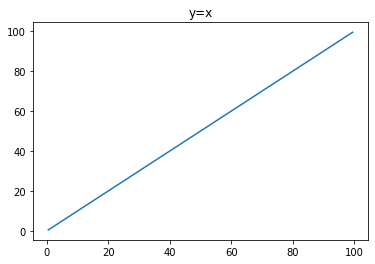

In [84]:
x=np.arange(0.5, 100.0, 0.5)
y=x
fig, ax=plt.subplots()
ax.plot(x, y)
plt.title("y=x")

**2. $y=x^2$**

Text(0.5, 1.0, 'y=x^2')

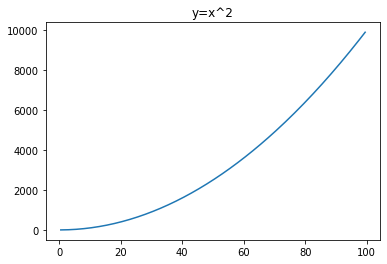

In [85]:
y=x**2
fig, ax=plt.subplots()
ax.plot(x, y)
plt.title("y=x^2")

**3. $y=\frac{x^3}{100}$**

Text(0.5, 1.0, 'y=x^3/100')

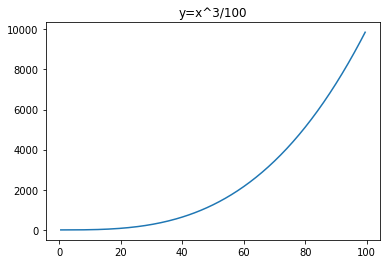

In [86]:
y=x**3/100
fig, ax=plt.subplots()
ax.plot(x, y)
plt.title("y=x^3/100")

**4. $y=sin(x)$**

Text(0.5, 1.0, 'y=sin(x)')

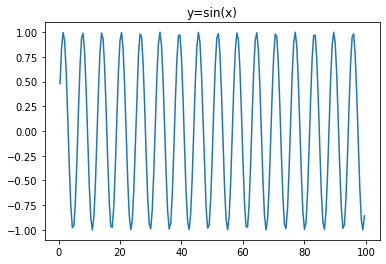

In [87]:
y=np.sin(x)
fig, ax=plt.subplots()
ax.plot(x, y)
plt.title("y=sin(x)")

**5. $y=\frac{sin(x)}{x}$**

Text(0.5, 1.0, 'y=sin(x)/x')

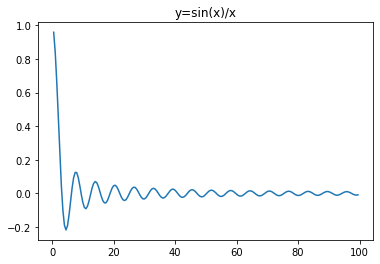

In [88]:
y=np.sin(x)/x
fig, ax=plt.subplots()
ax.plot(x, y)
plt.title("y=sin(x)/x")

**6. $log(x)$**

Text(0.5, 1.0, 'y=log(x)')

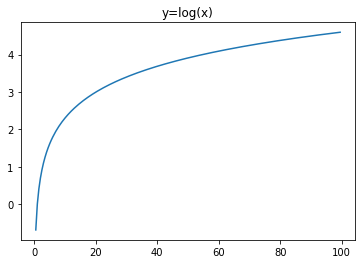

In [89]:
y=np.log(x)
fig, ax=plt.subplots()
ax.plot(x, y) 
plt.title("y=log(x)")

**7. $y=e^x$**

Text(0.5, 1.0, 'y=e^x')

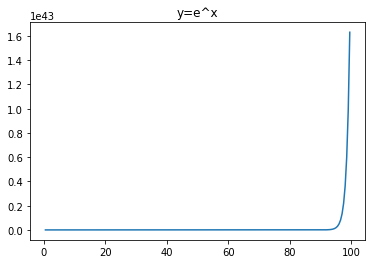

In [90]:
y=np.exp(x)
fig, ax=plt.subplots()
ax.plot(x, y)
plt.title("y=e^x")

**<h2>Question 10<h2>**

In [91]:
import pandas as pd

mat=np.random.uniform(1, 2, size=(20, 5))
# print(mat)

df=pd.DataFrame(mat)
df.head()

df.columns=["a", "b", "c", "d", "e"]
df.head()

sd=df.std()
print("Standard Deviation of the columns are: ")
print(sd)
print("The column with highest standard deviation is:", df.std().idxmax(), "\n")

mean=df.mean(axis=1)
print("Mean of the rows are: ")
print(mean)
print("The row with lowest mean is:", df.mean(axis=1).idxmin())

Standard Deviation of the columns are: 
a    0.324344
b    0.209742
c    0.244810
d    0.301187
e    0.239423
dtype: float64
The column with highest standard deviation is: a 

Mean of the rows are: 
0     1.471066
1     1.635817
2     1.257893
3     1.537825
4     1.575104
5     1.345455
6     1.355555
7     1.623762
8     1.420128
9     1.586509
10    1.549461
11    1.701517
12    1.496521
13    1.425633
14    1.552731
15    1.532684
16    1.557868
17    1.695914
18    1.688910
19    1.315839
dtype: float64
The row with lowest mean is: 2


**<h2>Question 11<h2>**

In [93]:
df['f']=df[['a', 'b', 'c', 'd', 'e']].sum(axis=1)
df.head() 

def greater(row):
  if(row['g']=='GT8'):
    return row['f']
  else:
    return np.nan

def less(row):
  if(row['g']=='LT8'):
    return row['f']
  else:
    return np.nan

# df['g']=df.apply(lambda row: row_sum(row), axis=1)
df["g"] = np.where(df["f"] < 8, "LT8", "GT8")
df.head()
n=df[df['g']=='LT8'].shape[0]

df['g_LT8']=df.apply(lambda row: less(row), axis=1)
df['g_GT8']=df.apply(lambda row: greater(row), axis=1)
print(df)

sd_gt=df['g_GT8'].std(skipna=True)
sd_lt=df['g_LT8'].std(skipna=True)         

print("\n")
print("The number of LT8 rows is:", n)
print("The standard deviation of values less than 8 is:", sd_lt)
print("The standard deviation of values greater than 8 is:", sd_gt)

           a         b         c         d         e         f    g     g_LT8  \
0   1.868080  1.582194  1.204934  1.213482  1.486638  7.355329  LT8  7.355329   
1   1.890212  1.618925  1.652633  1.433915  1.583398  8.179083  GT8       NaN   
2   1.141826  1.079420  1.815970  1.077429  1.174820  6.289465  LT8  6.289465   
3   1.276063  1.667450  1.507353  1.414894  1.823363  7.689124  LT8  7.689124   
4   1.261854  1.275701  1.825217  1.642223  1.870524  7.875518  LT8  7.875518   
5   1.562801  1.360263  1.336291  1.059984  1.407937  6.727277  LT8  6.727277   
6   1.069839  1.464748  1.483576  1.569575  1.190039  6.777777  LT8  6.777777   
7   1.321529  1.713950  1.315465  1.939073  1.828793  8.118810  GT8       NaN   
8   1.235890  1.161770  1.701105  1.521614  1.480264  7.100642  LT8  7.100642   
9   1.688074  1.706206  1.605658  1.262266  1.670342  7.932546  LT8  7.932546   
10  1.823046  1.496607  1.679829  1.231832  1.515993  7.747307  LT8  7.747307   
11  1.778477  1.393035  1.94

**<h2>Question 12<h2>**

Broadcasting feature makes it possible to conduct arithmetic operations amongst arrays of various forms. It enables numpy to stretch the smaller array to take on the form of the larger array, enabling element-wise manipulation as shown in the example below.

In [94]:
# matrix of size 3x2
val1=np.array([[1, 2],
                [3, 4],
                [5, 8]])
print("The shape of first array is:", val1.shape)

val2=np.array([5, 9])
print("The shape of second array is:",val2.shape, "\n")

val3=val1+val2
print("After broadcasting we get the following array:")
print(val3)
print("The shape of the resultant array is:", val3.shape)

The shape of first array is: (3, 2)
The shape of second array is: (2,) 

After broadcasting we get the following array:
[[ 6 11]
 [ 8 13]
 [10 17]]
The shape of the resultant array is: (3, 2)


In the above code, $val_1$ is an array of $3\times 2$ dimension and $val_2$ is just a 1D array with $1 \times 2$ dimensions. When both of them are added, $val_2$ is broadcasted to the dimensions of $val_1$ i.e., $3\times 2$ since it is of smaller dimension so that matrix addition is carried out.

In the example above, $val_1$ is streched to $3\times 2$ 2D array. The values in the first row are copied in the other rows to do so. Thus, matrix addition is carried out seamlessly.  

**<h2>Question 13<h2>**

In [96]:
def my_argmin(arr):
  min=arr[0]   # to store the minimum element of the array
  ind=0   # to store the index of the minimum element

  for index, element in enumerate(arr):
    if element<min:
      min=element
      ind=index

  return ind

array=np.random.randint(10, size=5)
my_ans=my_argmin(array)
numpy_ans=np.argmin(array)

print(array)
print("Index of the minimum element of the array using the function created:", my_ans)
print("Index of the minimum element of the array using the in-built function:", numpy_ans)

assert my_ans==numpy_ans

[8 8 1 0 7]
Index of the minimum element of the array using the function created: 3
Index of the minimum element of the array using the in-built function: 3


In [97]:
# Python program to find second largest
# number in a list

# list of numbers - length of
# list should be at least 2
list1 = [10, 20, 4, 45, 99]

mx = max(list1[0], list1[1])
secondmax = min(list1[0], list1[1])
n = len(list1)
for i in range(2,n):
	if list1[i] > mx:
		secondmax = mx
		mx = list1[i]
	elif list1[i] > secondmax and \
		mx != list1[i]:
		secondmax = list1[i]
	elif mx == secondmax and \
		secondmax != list1[i]:
		secondmax = list1[i]

print("Second highest number is : ",secondmax)
print(mx)


Second highest number is :  45
99
